In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def sample_sc_lattice(a, size, prob):
    """
    Create a simple cubic (SC) lattice with lattice constant "a." 
    "size" is the number of unit cells along each axis.
    Dilute lattice sites according to probability "prob."
    """
    grid_range = np.arange(-size, size + 1)
    Ncells = len(grid_range) ** 3
    total_sites = Ncells  # 1 site per SC unit cell

    N_occupied = int(total_sites * prob)
    chosen_idx = np.random.choice(total_sites, N_occupied, replace=False)

    n_grid = len(grid_range)
    L = chosen_idx // (n_grid ** 2)
    M = (chosen_idx // n_grid) % n_grid
    N = chosen_idx % n_grid

    L = L + grid_range[0]
    M = M + grid_range[0]
    N = N + grid_range[0]

    coords = np.stack([L, M, N], axis=1) * a
    return coords



def sample_bcc_lattice(a, size, prob):
    """
    Create a body centered cubic (BCC) lattice with lattice constant "a." 
    "size" is the number of unit cells along each axis.
    Dilute lattice sites according to probability "prob."
    """
    grid_range = np.arange(-size, size + 1)
    Ncells = len(grid_range) ** 3
    total_sites = Ncells * 2  # 2 atoms per BCC unit cell

    N_occupied = int(total_sites * prob)
    chosen_idx = np.random.choice(total_sites, N_occupied, replace=False)

    unit_index = chosen_idx // 2
    basis_index = chosen_idx % 2

    n_grid = len(grid_range)
    L = unit_index // (n_grid**2)
    M = (unit_index // n_grid) % n_grid
    N = unit_index % n_grid

    L = L + grid_range[0]
    M = M + grid_range[0]
    N = N + grid_range[0]
    coords_unit = np.stack([L, M, N], axis=1) * a

    basis = np.array([[0,0,0],[0.5,0.5,0.5]]) * a
    coords = coords_unit + basis[basis_index]

    return coords



def sample_fcc_lattice(a, size, prob):
    """
    Create a face centered cubic (FCC) lattice with lattice constant "a." 
    "size" is the number of unit cells along each axis.
    Dilute lattice sites according to probability "prob."
    """
    grid_range = np.arange(-size, size + 1)
    Ncells = len(grid_range) ** 3
    total_sites = Ncells * 4  # 4 atoms per FCC unit cell

    N_occupied = int(total_sites * prob)
    chosen_idx = np.random.choice(total_sites, N_occupied, replace=False)

    unit_index = chosen_idx // 4
    basis_index = chosen_idx % 4

    n_grid = len(grid_range)
    L = unit_index // (n_grid**2)
    M = (unit_index // n_grid) % n_grid
    N = unit_index % n_grid

    L = L + grid_range[0]
    M = M + grid_range[0]
    N = N + grid_range[0]
    coords_unit = np.stack([L, M, N], axis=1) * a

    basis = (a/2) * np.array([
        [0,0,0],
        [1,1,0],
        [1,0,1],
        [0,1,1]
    ])
    coords = coords_unit + basis[basis_index]

    return coords



def sample_diamond_lattice(a, size, prob):
    """
    Create a diamond lattice with lattice constant "a." 
    "size" is the number of unit cells along each axis.
    Dilute lattice sites according to probability "prob."
    """
    grid_range = np.arange(-size, size + 1)
    Ncells = len(grid_range) ** 3
    total_sites = Ncells * 8  # 8 atoms per diamond unit cell

    N_occupied = int(total_sites * prob)
    chosen_idx = np.random.choice(total_sites, N_occupied, replace=False)

    unit_index = chosen_idx // 8
    basis_index = chosen_idx % 8

    n_grid = len(grid_range)
    L = unit_index // (n_grid**2)
    M = (unit_index // n_grid) % n_grid
    N = unit_index % n_grid

    L = L + grid_range[0]
    M = M + grid_range[0]
    N = N + grid_range[0]
    coords_unit = np.stack([L, M, N], axis=1) * a

    # Diamond basis (FCC + offset)
    fcc = (a/2) * np.array([
        [0,0,0],
        [1,1,0],
        [1,0,1],
        [0,1,1]
    ])
    offset = (a/4) * np.array([1,1,1])
    basis = np.vstack([fcc, fcc+offset])

    coords = coords_unit + basis[basis_index]
    return coords



def build_lattice(lattice_type, a, size, prob):
    """
    Dispatcher function. Given a string, it will build that lattice type.
    """
    if lattice_type == "SC":
        coords = sample_sc_lattice(a, size, prob)
        nn_dist = a
        return coords, nn_dist
    elif lattice_type == "BCC":
        coords = sample_bcc_lattice(a, size, prob)
        nn_dist = a * (np.sqrt(3) / 2)
        return coords, nn_dist
    elif lattice_type == "FCC":
        coords = sample_fcc_lattice(a, size, prob)
        nn_dist = a * (1 / np.sqrt(2))
        return coords, nn_dist
    elif lattice_type == "diamond":
        coords = sample_diamond_lattice(a, size, prob)
        nn_dist = a * (np.sqrt(3) / 4)
        return coords, nn_dist
    else:
        raise ValueError(f"Unknown lattice type: {lattice_type}")



# def calculate_W(a, size, lattice, nn_dist, A, alpha, nearest_neighbor=False):
#     """
#     calculate hopping/jumping rate matrix between sites. Strength given by A,
#     for long-range coupling, power-law exponent is given by alpha.
#     """

#     N = lattice.shape[0] #total number of sites
#     W = np.zeros((N, N)) #initialize hopping matrix
#     box_size = a * (2*size + 1)

#     #loop through all site pairs without double counting
#     for i in range(N - 1):
#         for j in range(i + 1, N):
#             diff = lattice[i] - lattice[j]
#             diff = diff - box_size * np.round(diff / box_size) #periodic boundary conditions
#             dist = np.linalg.norm(diff)

#             if nearest_neighbor:
#                 if np.isclose(dist, nn_dist, atol=1e-6):
#                     wij = A
#                 else:
#                     wij = 0
#             else:
#                 wij = A / (dist**alpha)
            
#             W[i, j] = wij
#             W[j, i] = wij #symmetry

#     #on diagonal elements should be negative of total leaving that site for probability conservation
#     W = W - np.diag(np.sum(W, axis=0)) 
    
#     return W


#vectorized calculation for better speed
def calculate_W(a, size, lattice, nn_dist, A, alpha, nearest_neighbor=False):
    """
    calculate hopping/jumping rate matrix between sites. Strength given by A,
    for long-range coupling, power-law exponent is given by alpha.
    """

    N = lattice.shape[0] #total number of sites
    box_size = a * (2*size + 1)

    diff = lattice[:, None, :] - lattice[None, :, :]
    diff = diff - box_size * np.round(diff / box_size)
    dist = np.linalg.norm(diff, axis=2)

    np.fill_diagonal(dist, np.inf)

    if nearest_neighbor:
        mask = np.isclose(dist, nn_dist, atol=1e-6)
        W_off = np.zeros_like(dist)
        W_off[mask] = A
    else:
        with np.errstate(over='ignore', divide='ignore', invalid='ignore'):
            W_off = A / (dist**alpha)
    
    np.fill_diagonal(W_off, 0)
    col_sums = np.sum(W_off, axis=0)
    W = W_off - np.diag(col_sums)
    
    return W

In [3]:
def periodic_distance(r1, r2, size, a):
    """
    calculate distance between two points r1 and r2 with periodic boundary conditions
    """
    
    box_size = a * (2*size + 1)
    diff = r2 - r1
    diff_wrapped = diff - box_size * np.round(diff / box_size)
    dist = np.linalg.norm(diff_wrapped)
    return dist



def gillespie(size, a, W, lattice, t_max):
    """
    Simulate random walk for one walker using gillespie algorithm.
    Randomly start on a site and sample next time step from an exponential probability distribution 
    with mean given by total escape rate from that site. Then randomly jump to next site based on probability
    proportional to the hopping rate to that site. Then collect statistics.
    """
    
    N = W.shape[0] #total number of sites
    site = np.random.randint(N) #start on a random site
    time = 0

    sites = [site]
    wait_times = []
    times = [0]

    #gillespie loop
    while time < t_max:
        rates = W[:, site] #vector of hopping rate to each site
        total_rate = -W[site, site] #total hopping rate from site

        if total_rate <= 0:
            break

        tau = np.random.exponential(1 / total_rate) #randomly sample time to next hop from an exponential distirbution (gillespie)
        time += tau

        probs = rates.copy()
        probs[site] = 0 #no self-hopping
        probs /= total_rate #normalize
        next_site = np.random.choice(N, p=probs) #randomly choose what site to jump to

        #collect data
        wait_times.append(tau)
        sites.append(next_site)
        times.append(time)

        site = next_site

    #calculate all jump lengths and squared displacements (using periodic boundary conditions).
    jump_lengths = [periodic_distance(lattice[sites[i+1]], lattice[sites[i]], size, a) for i in range(len(sites) - 1)]
    squared_displacements = [periodic_distance(lattice[sites[i]], lattice[sites[0]], size, a)**2 for i in range(len(sites))]

    #calculate number of distinct visited sites
    visited = set()
    distinct_sites = []
    for site in sites:
        visited.add(site)
        distinct_sites.append(len(visited))

    return wait_times, jump_lengths, times, squared_displacements, distinct_sites, sites



def ensemble_average(size, a, W, lattice, t_max, n_trajectories):
    """
    ensemble average over "n_trajectories" different random walkers on the same lattice
    """
    from tqdm import tqdm
    
    trajectories = []

    #loop over n_trajectories of random walkers and collect statistics
    for _ in range(n_trajectories):
        wait_times, jump_lengths, times, sq_disp, distinct_sites, sites = gillespie(size, a, W, lattice, t_max)

        traj = {
            'wait_times': wait_times,
            'jump_lengths': jump_lengths,
            'times': times,
            'sq_disp': sq_disp,
            'distinct_sites': distinct_sites,
            'sites': sites
        }

        trajectories.append(traj)

    return trajectories



def config_average(size, a, lattice_type, prob, nearest_neighbor, A, alpha, t_max, n_trajectories, n_configs):
    """
    For dilute lattices/networks, each realization will be random and different from the next.
    This function will ensemble average the gillespie algorithm over n_configs different lattice realizations
    (Monte Carlo). 
    """
    from tqdm import tqdm

    trajectories = []
    
    #loop over different configurations (Monte Carlo)
    for _ in tqdm(range(n_configs), desc="configurations"):
        
        #reconstruct lattice every iteration and calculate W each time
        lattice, nn_dist = build_lattice(lattice_type, a, size, prob)
        W = calculate_W(a, size, lattice, nn_dist, A, alpha, nearest_neighbor)

        traj = ensemble_average(size, a, W, lattice, t_max, n_trajectories)

        trajectories.extend(traj)

    return trajectories

In [4]:
def run_simulation(
    size, 
    a, 
    lattice_type, 
    diluted, 
    prob, 
    nearest_neighbor, 
    A, 
    alpha, 
    t_max, 
    n_trajectories, 
    n_configs, 
    savefile=None 
):
    """
    High-level function. Setup lattice, dilute lattice if necessary, contruct hopping rate matrix, 
    and run random walk simulations. 
    
    Parameters:
    size (natural number): number of unit cells along each axis
    a (float): lattice constant
    lattice_type (string): "SC", "BCC", "FCC", or "diamond"
    diluted (True/False): Is the lattice 100% concentration? T/F
    prob (float): If diluted, what is the concentration? Must be between 0 and 1.
    nearest_neighbor (True/False): Is the hopping only between nearest neighbors? T/F
    A (float): Hopping rate = A / (r**alpha), r is distance between sites.
    alpha (float): Hopping rate = A / (r**alpha), r is distance between sites.
    t_max (float): Maximum time for gilllespie algorithm to run for each random walker.
    n_trajectories (natural number): Number of ensemble averages. 
    n_configs (natural number): Number of configurational averages/Monte Carlo trajectories.
    savefile=None (string (or None)): Filename for saving

    Returns:
    Dictionary of results:
        'wait_times': list of waiting times from all random walkers,
        'jump_lengths': list of jump lengths from all random walkers,
        'msd_vs_steps': 1D array of mean squared displacement vs. step number,
        't_bins': 1D array of time,
        'msd_vs_time': 1D array of mean squared displacement vs. time,
        'distinct_sites_vs_steps': 1D array of number of distinct sites visited vs. step number,
        'all_times': list of all the different time points where a jump happened,
        'all_sites': list of all the different site indices that were jumped to
    """

    #Only need to configuartional average if the lattice is diluted. Otherwise, every lattice configuration is identical
    #so just need to construct the lattice once
    if diluted:
        results = config_average(
            size, a, lattice_type, prob, nearest_neighbor, A, alpha, t_max, n_trajectories, n_configs)
    else:
        lattice, nn_dist = build_lattice(lattice_type, a, size, prob) 
        W = calculate_W(a, size, lattice, nn_dist, A, alpha, nearest_neighbor)
        
        results = ensemble_average(size, a, W, lattice, t_max, n_trajectories)

    if savefile is not None:
        np.savez(
            savefile,
            results=results,
            size=size,
            a=a,
            lattice_type=lattice_type,
            diluted=diluted,
            prob=prob,
            nearest_neighbor=nearest_neighbor, 
            A=A,
            alpha=alpha,
            t_max=t_max,
            n_trajectories=n_trajectories,
            n_configs=n_configs, 
        )

    return results

In [5]:
def pad(data):
    """
    pad data with np.nan (for data that is a list of arrays of different sizes).
    """
    
    x = len(data)
    y = max(len(arr) for arr in data)
    padded_data = np.full((x, y), np.nan)
    for i in range(x):
        padded_data[i, :len(data[i])] = data[i]
    return padded_data


def contribution_threshold(data, cutoff_fraction):
    """
    Find the time index where certain fraction of the trajectories contribute.
    Basically, some random walkers will get stuck at a site for a long time and overshoot t_max
    by a lot. So time points will only have a few trajectories contributing to the ensemble average, 
    making it not a good statistical average/too small of a sample size.
    """
    
    data_arr = np.array(data)
    n_trajectories = data_arr.shape[0]
    min_required = int(cutoff_fraction * n_trajectories)  
    valid_counts = np.sum(~np.isnan(data), axis=0)
    cutoff_idx = np.where(valid_counts < min_required)[0]
    if len(cutoff_idx) > 0:
        last_valid_idx = cutoff_idx[0]
    else:
        last_valid_idx = data_arr.shape[1]
        
    return last_valid_idx


def average_trajectories(trajectories, t_max):
    """
    Carefully calculate averages of different variables over different random walkers 
    and different lattice configurations. 
    This is nontrivial since each random walker hops at different time points.
    """
    
    all_squared_displacements = [traj['sq_disp'] for traj in trajectories]
    all_times = [traj['times'] for traj in trajectories]
    all_distinct_sites = [traj['distinct_sites'] for traj in trajectories]

    #MSD vs steps
    padded_disp = pad(all_squared_displacements)
    msd_vs_steps = np.nanmean(padded_disp, axis=0)
    last_valid_idx = contribution_threshold(padded_disp, 0.8)
    msd_vs_steps = msd_vs_steps[:last_valid_idx]

    #MSD vs time
    from scipy.interpolate import interp1d

    t_bins = np.linspace(0, t_max, last_valid_idx)
    all_interp_disp = []
    for times, sq_disp in zip(all_times, all_squared_displacements):
        times = np.array(times)
        sq_disp = np.array(sq_disp)
        valid_mask = times <= t_max
        f = interp1d(times[valid_mask], sq_disp[valid_mask],
                     kind='previous', bounds_error=False, fill_value=np.nan)
        interp_disp = f(t_bins)
        all_interp_disp.append(interp_disp)

    msd_vs_time = np.nanmean(all_interp_disp, axis=0)
    last_valid_idx_time = contribution_threshold(all_interp_disp, 0.8)
    t_bins = t_bins[:last_valid_idx_time]
    msd_vs_time = msd_vs_time[:last_valid_idx_time]

    #Distinct sites visited vs steps
    padded_distinct_sites = pad(all_distinct_sites)
    distinct_sites_vs_steps = np.nanmean(padded_distinct_sites, axis=0)
    last_valid_idx_sites = contribution_threshold(padded_distinct_sites, 0.8)
    distinct_sites_vs_steps = distinct_sites_vs_steps[:last_valid_idx_sites]

    return msd_vs_steps, msd_vs_time, t_bins, distinct_sites_vs_steps

In [83]:
import time
start_time = time.time()

results = run_simulation(
    size=25,
    a=1,
    lattice_type="diamond",
    diluted=False,
    prob=0.01,
    nearest_neighbor=False, 
    A=1,
    alpha=6,
    t_max=150,
    n_trajectories=30,
    n_configs=1, 
    savefile=None
)

end_time = time.time()
print(end_time - start_time)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:23<00:00,  1.26it/s]


44.05496096611023


C:\Users\coope\AppData\Local\Temp\ipykernel_17332\1542559163.py:66: RuntimeWarning: Mean of empty slice
  msd_vs_time = np.nanmean(all_interp_disp, axis=0)


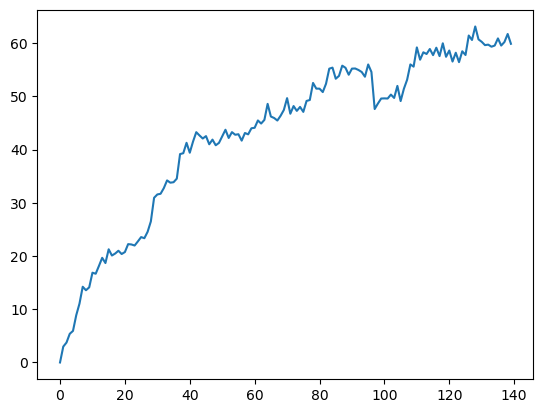

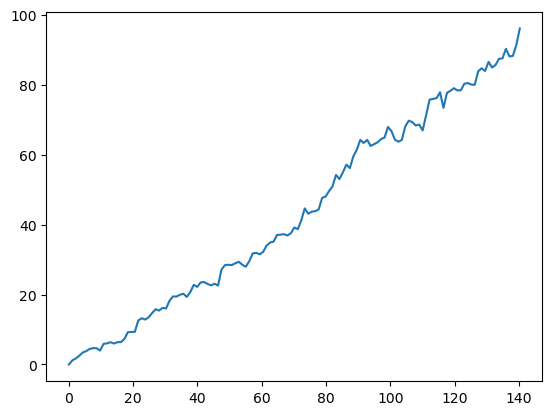

131
107.91366906474819


In [84]:
t_max = 150
msd_vs_steps, msd_vs_time, t_bins, distinct_sites_vs_steps = average_trajectories(results, t_max)

n_steps = np.arange(0, len(msd_vs_steps))
plt.figure()
plt.plot(n_steps, msd_vs_steps)
plt.show()

plt.figure()
plt.plot(t_bins, msd_vs_time)
plt.show()

print(len(t_bins))
print(t_bins[100])